# EDA & Cleaning

[P1: Investigating / Cleaning Game Data](#p1)          

[P2: Investigating / Cleaning Plays Data](#p2)

[P3: Investigating / Cleaning Player Data](#p3)

[P4: Raw GPS Data Cleaning](#p4)

[P5: Selecting Data for Analysis](#p5)

[P6: Extracting Frames](#p6)

[P7: Flattening Plays](#p7)

## P1: Investigating / Cleaning Game Data <a id='p1'></a>

In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', None)
import re
import seaborn as sns
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [212]:
games=pd.read_csv('/Users/jamesgibbins/Desktop/DSI_capstone/nfl_big_data_bowl_2021_raw_data/games.csv')

In [213]:
# check for missing values
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gameId           253 non-null    int64 
 1   gameDate         253 non-null    object
 2   gameTimeEastern  253 non-null    object
 3   homeTeamAbbr     253 non-null    object
 4   visitorTeamAbbr  253 non-null    object
 5   week             253 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 12.0+ KB


In [214]:
games.homeTeamAbbr.unique()

array(['PHI', 'CLE', 'IND', 'MIA', 'BAL', 'NE', 'NYG', 'NO', 'ARI', 'CAR',
       'GB', 'DET', 'OAK', 'CIN', 'NYJ', 'BUF', 'ATL', 'PIT', 'WAS',
       'TEN', 'TB', 'SF', 'LA', 'DEN', 'JAX', 'DAL', 'CHI', 'HOU', 'KC',
       'MIN', 'SEA', 'LAC'], dtype=object)

In [215]:
# check if home and away teams are matching / numbers of each

home=sorted(games.homeTeamAbbr.unique())
away=sorted(games.visitorTeamAbbr.unique())

print(len(home))
print(len(away))

set(home) == set(away)

32
32


True

In [216]:
# confirm all game Ids are unique
len(games.gameId.unique())

253

In [449]:
# check if we have data for all games (16 games per gameweek)

print(games.week.unique())
print(games.week.value_counts())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
17    16
3     16
15    16
14    16
13    16
2     16
16    16
12    15
6     15
5     15
4     15
10    14
8     14
7     14
9     13
11    13
1     13
Name: week, dtype: int64


In [450]:
games.gameTimeEastern.unique()

array(['20:20:00', '13:00:00', '16:25:00', '19:10:00', '22:20:00',
       '16:05:00', '20:15:00', '09:30:00', '12:30:00', '16:30:00'],
      dtype=object)

In [451]:
games.gameDate.unique()

array(['09/06/2018', '09/09/2018', '09/10/2018', '09/13/2018',
       '09/16/2018', '09/17/2018', '09/20/2018', '09/23/2018',
       '09/24/2018', '09/27/2018', '09/30/2018', '10/01/2018',
       '10/04/2018', '10/07/2018', '10/08/2018', '10/11/2018',
       '10/14/2018', '10/15/2018', '10/18/2018', '10/21/2018',
       '10/22/2018', '10/25/2018', '10/28/2018', '10/29/2018',
       '11/01/2018', '11/04/2018', '11/05/2018', '11/08/2018',
       '11/11/2018', '11/12/2018', '11/15/2018', '11/18/2018',
       '11/19/2018', '11/22/2018', '11/25/2018', '11/26/2018',
       '11/29/2018', '12/02/2018', '12/03/2018', '12/06/2018',
       '12/09/2018', '12/10/2018', '12/13/2018', '12/15/2018',
       '12/16/2018', '12/17/2018', '12/23/2018', '12/24/2018',
       '12/30/2018', '12/22/2018'], dtype=object)

In [452]:
home_df=pd.DataFrame(games.homeTeamAbbr.value_counts().reset_index())
away_df=pd.DataFrame(games.visitorTeamAbbr.value_counts().reset_index())
pd.merge(home_df, away_df, on='index').sort_values(['homeTeamAbbr','visitorTeamAbbr'])

,index,homeTeamAbbr,visitorTeamAbbr
29,MIN,7,8
30,DEN,7,8
31,LAC,7,8
4,SEA,8,7
12,SF,8,7
20,KC,8,7
0,WAS,8,8
1,HOU,8,8
2,CHI,8,8
3,JAX,8,8


In [453]:
games.columns=['gameId', 'gameDate', 'gameTimeET', 'home',
       'away', 'week']

In [454]:
games.head(3)

,gameId,gameDate,gameTimeET,home,away,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1


In [ ]:
games.to_csv('/Users/jamesgibbins/Desktop/DSI_capstone/capstone_data/games_clean.csv', index=False)

## P1: Summary <a id='p1.1'></a>

- Games data covers 253 matches out of 256 total matches for the 2018 NFL season across 17 game weeks.

- Each match has a unique identifier, gameId.

- All 32 NFL teams are represented amongst matches home and away

- Every team is represented by a unique 2 or 3 letter abbreviation.

- The following teams are missing one game of data: DEN, KC, LAC, MIN, SEA, SF. All other teams have data for all 16 games.

- Date and kick-off time is provided for all matches in Eastern Time Zone

- Shortened some column names 

## P2: Investigating / Cleaning Plays Data <a id='p2'></a>

In [324]:
plays=pd.read_csv('/Users/jamesgibbins/Desktop/DSI_capstone/nfl_big_data_bowl_2021_raw_data/plays.csv')

In [325]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19239 non-null  int64  
 1   playId                  19239 non-null  int64  
 2   playDescription         19239 non-null  object 
 3   quarter                 19239 non-null  int64  
 4   down                    19239 non-null  int64  
 5   yardsToGo               19239 non-null  int64  
 6   possessionTeam          19239 non-null  object 
 7   playType                19239 non-null  object 
 8   yardlineSide            18985 non-null  object 
 9   yardlineNumber          19239 non-null  int64  
 10  offenseFormation        19098 non-null  object 
 11  personnelO              19210 non-null  object 
 12  defendersInTheBox       19177 non-null  float64
 13  numberOfPassRushers     18606 non-null  float64
 14  personnelD              19210 non-null

### P2.1 Creating Unique Id for each play <a id='p2.1'></a>

In [326]:
# confirm gameIds match across games and plays data
set(plays.gameId.unique()) == set(games.gameId)

True

In [327]:
# check if playIds are unique - they are not
plays.playId.value_counts()[:5]

51      45
73      15
3594    14
2994    14
95      13
Name: playId, dtype: int64

In [328]:
plays.playId.min()

50

In [329]:
plays.playId.max()

5661

In [330]:
# create uniqueId across all plays by combining gameId and playId

plays['uniqueId']=plays['gameId']*10000+plays['playId']

print('No. unique Ids:', len(plays.uniqueId.unique()))

plays[['gameId','playId','uniqueId']][:5]

No. unique Ids: 19239


,gameId,playId,uniqueId
0,2018090600,75,20180906000075
1,2018090600,146,20180906000146
2,2018090600,168,20180906000168
3,2018090600,190,20180906000190
4,2018090600,256,20180906000256


### P2.2 Dealing with Play Types / Penalty Plays <a id='p2.2'></a>

In [331]:
plays['penalty']=[0 if plays['penaltyCodes'][i] is np.nan else 1 for i in range(len(plays))]

In [332]:
# 1206 plays involve penalties
plays['penalty'].value_counts()

0    18033
1     1206
Name: penalty, dtype: int64

In [333]:
pens=plays[plays.penalty==1]

In [334]:
pens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 25 to 19238
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  1206 non-null   int64  
 1   playId                  1206 non-null   int64  
 2   playDescription         1206 non-null   object 
 3   quarter                 1206 non-null   int64  
 4   down                    1206 non-null   int64  
 5   yardsToGo               1206 non-null   int64  
 6   possessionTeam          1206 non-null   object 
 7   playType                1206 non-null   object 
 8   yardlineSide            1191 non-null   object 
 9   yardlineNumber          1206 non-null   int64  
 10  offenseFormation        1158 non-null   object 
 11  personnelO              1177 non-null   object 
 12  defendersInTheBox       1160 non-null   float64
 13  numberOfPassRushers     573 non-null    float64
 14  personnelD              1177 non-null 

In [335]:
pens['penaltyCodes'].unique()

array(['RPS', 'ING', 'IBW', 'UNRd', 'UNR', 'OH', 'ILF', 'ILM', 'OPI',
       'TAU;TAUd;TAU', 'DOF', 'RPS;UNRd', 'DH', 'ICT', 'TAUd', 'TRP',
       'UNSd', 'FMM', 'IDP', 'ITP', 'UOHd', 'DSQ', 'DH;DH', 'ILHd',
       'DSQd', 'TAU', 'IBB', 'DOF;RPS', 'DPI', 'DH;UNSd', 'UNRd;ICT',
       'FMM;HC', 'DOG', 'HC', 'ISH', 'ILH', 'UNS', 'OH;IBB', 'ICB',
       'UNR;UNRd', 'DH;DPI', 'UNRd;DH', 'ICT;UNSd', 'IFP', 'OH;OH', 'DTM',
       'UNRd;UNR', 'CHB', 'DSQ;DSQd', 'IBW;ISH', 'UNS;UNSd', 'ILH;OH',
       'RPS;DOF', 'UOH', 'IBW;OH', 'TAUd;UNSd', 'DH;OPI', 'ILM;DH',
       'DPI;OPI', 'ICT;TAU', 'OH;DH', 'DOF;DPI', 'DPI;FMM', 'OH;RPS',
       'ICT;ICT', 'DPI;ILH', 'DH;ING', 'DPI;DH', 'DH;DOF', 'DPI;DOF',
       'ICT;OPI', 'DPI;ICT;DH', 'OPI;IDP', 'OPI;DH', 'OPI;OH', 'RPS;UNR',
       'DH;OH', 'ICT;DPI', 'DH;ICT', 'OPI;UNS', 'ICT;DH', 'RPS;ICT',
       'OH;DH;OH', 'OH;DPI', 'TAUd;DH', 'OPI;ILF'], dtype=object)

In [336]:
pens.playType.value_counts()

play_type_unknown    633
play_type_pass       520
play_type_sack        53
Name: playType, dtype: int64

In [337]:
# all 633 cases of unknown play type are penalties
plays.playType.value_counts()

play_type_pass       17346
play_type_sack        1260
play_type_unknown      633
Name: playType, dtype: int64

In [338]:
pen_uids = pens['uniqueId']

In [339]:
ukn_uIds = plays[plays.playType=='play_type_unknown']['uniqueId']

In [340]:
#drop penalties / unknown plays
plays=plays[(plays.playType!='play_type_unknown')&(plays.penalty!=1)]

In [341]:
#drop penalty columns
plays.drop(['penaltyCodes','penaltyJerseyNumbers','isDefensivePI','penalty'], axis=1, inplace=True)

In [342]:
plays.playType.value_counts()

play_type_pass    16826
play_type_sack     1207
Name: playType, dtype: int64

In [343]:
#drop sack play type
plays=plays[(plays.playType!='play_type_sack')]

### P2.3 Missing Info <a id='p2.3'></a>

In [344]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16826 entries, 0 to 18605
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  16826 non-null  int64  
 1   playId                  16826 non-null  int64  
 2   playDescription         16826 non-null  object 
 3   quarter                 16826 non-null  int64  
 4   down                    16826 non-null  int64  
 5   yardsToGo               16826 non-null  int64  
 6   possessionTeam          16826 non-null  object 
 7   playType                16826 non-null  object 
 8   yardlineSide            16611 non-null  object 
 9   yardlineNumber          16826 non-null  int64  
 10  offenseFormation        16734 non-null  object 
 11  personnelO              16826 non-null  object 
 12  defendersInTheBox       16810 non-null  float64
 13  numberOfPassRushers     16826 non-null  float64
 14  personnelD              16826 non-null

In [345]:
plays[plays['typeDropback'].isnull()][['uniqueId','typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber']]

,uniqueId,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber
506,20180909071537,NaN,NaN,NaN,NaN,NaN
1832,20180916102745,NaN,NaN,NaN,NaN,NaN
2651,20180923002705,NaN,NaN,NaN,NaN,NaN
6485,20181014061999,NaN,NaN,NaN,NaN,NaN
12296,20181125040336,NaN,NaN,NaN,NaN,NaN
15835,20181216050613,NaN,NaN,NaN,NaN,NaN


In [346]:
plays=plays[~plays['typeDropback'].isnull()]

In [347]:
plays.drop(['yardlineSide','yardlineNumber'], axis=1, inplace=True)

In [348]:
plays=plays[~plays['defendersInTheBox'].isnull()]

In [349]:
plays=plays[~plays['offenseFormation'].isnull()]

In [350]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16729 entries, 0 to 18605
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  16729 non-null  int64  
 1   playId                  16729 non-null  int64  
 2   playDescription         16729 non-null  object 
 3   quarter                 16729 non-null  int64  
 4   down                    16729 non-null  int64  
 5   yardsToGo               16729 non-null  int64  
 6   possessionTeam          16729 non-null  object 
 7   playType                16729 non-null  object 
 8   offenseFormation        16729 non-null  object 
 9   personnelO              16729 non-null  object 
 10  defendersInTheBox       16729 non-null  float64
 11  numberOfPassRushers     16729 non-null  float64
 12  personnelD              16729 non-null  object 
 13  typeDropback            16729 non-null  object 
 14  preSnapVisitorScore     16729 non-null

In [351]:
plays=plays.reset_index(drop=True)

### P2.4 Offensive and Defensive Personnel

In [352]:
plays.personnelO.value_counts()

1 RB, 1 TE, 3 WR               11871
1 RB, 2 TE, 2 WR                2445
2 RB, 1 TE, 2 WR                 968
1 RB, 3 TE, 1 WR                 362
1 RB, 0 TE, 4 WR                 236
0 RB, 1 TE, 4 WR                 150
2 RB, 2 TE, 1 WR                 143
2 RB, 0 TE, 3 WR                 131
6 OL, 1 RB, 1 TE, 2 WR            93
2 QB, 1 RB, 1 TE, 2 WR            47
0 RB, 2 TE, 3 WR                  43
6 OL, 1 RB, 2 TE, 1 WR            41
0 RB, 0 TE, 5 WR                  31
6 OL, 1 RB, 0 TE, 3 WR            26
3 RB, 1 TE, 1 WR                  18
6 OL, 2 RB, 2 TE, 0 WR            17
2 RB, 3 TE, 0 WR                  12
3 RB, 0 TE, 2 WR                  10
6 OL, 2 RB, 1 TE, 1 WR             9
6 OL, 2 RB, 0 TE, 2 WR             9
6 OL, 1 RB, 3 TE, 0 WR             8
2 QB, 1 RB, 0 TE, 3 WR             7
1 RB, 4 TE, 0 WR                   7
2 QB, 2 RB, 1 TE, 1 WR             6
2 QB, 0 RB, 1 TE, 3 WR             6
1 RB, 1 TE, 2 WR,1 DL              6
1 RB, 2 TE, 1 WR,1 DL              5
1

In [353]:
#splitting offensive personnel into a column per position

plays['personnelO']=plays.personnelO.str.replace(" ", "")
plays[['pO1','pO2','pO3','pO4','pO5']] = plays.personnelO.str.split(',',expand=True)

position='{}'
for p in ['RB','TE','WR','OL','QB','DL','DB']: 

    plays['1']=[int(plays.pO1[i][:1]) if position.format(p) in str(plays.pO1[i]) else 0 for i in range(len(plays))]
    plays['2']=[int(plays.pO2[i][:1]) if position.format(p) in str(plays.pO2[i]) else 0 for i in range(len(plays))]
    plays['3']=[int(plays.pO3[i][:1]) if position.format(p) in str(plays.pO3[i]) else 0 for i in range(len(plays))]
    plays['4']=[int(plays.pO4[i][:1]) if position.format(p) in str(plays.pO4[i]) else 0 for i in range(len(plays))]
    plays['5']=[int(plays.pO5[i][:1]) if position.format(p) in str(plays.pO5[i]) else 0 for i in range(len(plays))]


    plays['off_'+ position.format(p)]=plays['1']+plays['2']+plays['3']+plays['4']+plays['5']

    plays.drop(['1','2','3','4','5'],axis=1, inplace=True)
    
plays.drop(['pO1','pO2','pO3','pO4','pO5'],axis=1, inplace=True)

In [354]:
plays.personnelD.value_counts()

4 DL, 2 LB, 5 DB          5824
3 DL, 3 LB, 5 DB          2691
4 DL, 3 LB, 4 DB          2163
2 DL, 4 LB, 5 DB          1849
4 DL, 1 LB, 6 DB           935
3 DL, 2 LB, 6 DB           885
2 DL, 3 LB, 6 DB           788
3 DL, 4 LB, 4 DB           641
1 DL, 4 LB, 6 DB           271
1 DL, 5 LB, 5 DB           227
1 DL, 3 LB, 7 DB            84
5 DL, 2 LB, 4 DB            81
3 DL, 1 LB, 7 DB            73
2 DL, 2 LB, 7 DB            57
0 DL, 4 LB, 7 DB            26
4 DL, 4 LB, 3 DB            20
4 DL, 0 LB, 7 DB            20
0 DL, 5 LB, 6 DB            14
5 DL, 3 LB, 3 DB            13
5 DL, 1 LB, 5 DB            10
6 DL, 3 LB, 2 DB            10
6 DL, 4 LB, 1 DB             9
2 DL, 3 LB, 5 DB, 1 WR       4
0 DL, 6 LB, 5 DB             3
5 DL, 3 LB, 2 DB, 1 OL       3
4 DL, 5 LB, 2 DB             3
3 DL, 1 LB, 6 DB, 1 WR       3
6 DL, 1 LB, 4 DB             2
6 DL, 2 LB, 3 DB             2
2 DL, 3 LB, 5 DB             2
3 DL, 2 LB, 5 DB, 1 WR       2
3 DL, 1 LB, 6 DB, 1 TE       2
4 DL, 2 

In [355]:
#splitting defensive personnel into a column per position

plays['personnelD']=plays.personnelD.str.replace(" ", "")
plays[['def_DL','def_LB','def_DB','def_4']] = plays.personnelD.str.split(',',expand=True)

plays['def_DL']=[int(plays['def_DL'][i][:1]) if 'DL' in str(plays.def_DL[i]) else 0 for i in range(len(plays))]
plays['def_LB']=[int(plays['def_LB'][i][:1]) if 'LB' in str(plays.def_LB[i]) else 0 for i in range(len(plays))]
plays['def_DB']=[int(plays['def_DB'][i][:1]) if 'DB' in str(plays.def_DB[i]) else 0 for i in range(len(plays))]

position1='{}'
for p in ['TE','OL','WR']: 

    plays['9']=[int(plays.def_4[i][:1]) if position1.format(p) in str(plays.def_4[i]) else 0 for i in range(len(plays))]
   
    plays['def_'+ position1.format(p)]=plays['9']

    plays.drop(['9'],axis=1, inplace=True)
    
plays.drop(['def_4'],axis=1, inplace=True)

In [356]:
plays[['personnelO','off_RB','off_TE','off_WR','personnelD','def_DL','def_LB','def_DB']][:10]

,personnelO,off_RB,off_TE,off_WR,personnelD,def_DL,def_LB,def_DB
0,"2RB,1TE,2WR",2,1,2,"4DL,2LB,5DB",4,2,5
1,"1RB,1TE,3WR",1,1,3,"4DL,2LB,5DB",4,2,5
2,"2RB,1TE,2WR",2,1,2,"4DL,2LB,5DB",4,2,5
3,"1RB,1TE,3WR",1,1,3,"4DL,1LB,6DB",4,1,6
4,"2RB,3TE,0WR",2,3,0,"6DL,3LB,2DB",6,3,2
5,"1RB,1TE,3WR",1,1,3,"3DL,3LB,5DB",3,3,5
6,"1RB,2TE,2WR",1,2,2,"3DL,3LB,5DB",3,3,5
7,"1RB,1TE,3WR",1,1,3,"4DL,2LB,5DB",4,2,5
8,"1RB,2TE,2WR",1,2,2,"4DL,2LB,5DB",4,2,5
9,"1RB,2TE,2WR",1,2,2,"4DL,2LB,5DB",4,2,5


In [357]:
plays[plays['personnelO']=='6OL,2RB,1TE,0WR,1DL'][['personnelO','off_RB','off_TE','off_WR','off_OL',
                                                              'off_DL','off_DB','off_QB']]

,personnelO,off_RB,off_TE,off_WR,off_OL,off_DL,off_DB,off_QB
14068,"6OL,2RB,1TE,0WR,1DL",2,1,0,6,1,0,0
15699,"6OL,2RB,1TE,0WR,1DL",2,1,0,6,1,0,0


In [358]:
plays[plays['personnelD']=='5DL,3LB,2DB,1OL'][['personnelD','def_DL','def_LB','def_DB','def_OL']]

,personnelD,def_DL,def_LB,def_DB,def_OL
5048,"5DL,3LB,2DB,1OL",5,3,2,1
5049,"5DL,3LB,2DB,1OL",5,3,2,1
15186,"5DL,3LB,2DB,1OL",5,3,2,1


### P2.5 GAME CLOCK

In [455]:
plays.gameClock[:10]

0    15:00:00
1    13:10:00
2    13:05:00
3    13:01:00
4    10:59:00
5    10:10:00
6    09:24:00
7    09:08:00
8    07:01:00
9    06:19:00
Name: gameClock, dtype: object

In [456]:
plays['gameClock']=plays['gameClock'].apply(lambda x: x[:-3])

plays['secRemQu']=pd.to_datetime(plays['gameClock'], format="%M:%S")
plays['secRemQu']=plays['secRemQu'].apply(lambda x: x.minute * 60 + x.second)

# create feature that displays how long is left in each quarter in seconds (max = 900s = 15 min)
plays['secRemQu'].describe()

count    16729.000000
mean       413.243230
std        272.694633
min          0.000000
25%        157.000000
50%        398.000000
75%        652.000000
max        900.000000
Name: secRemQu, dtype: float64

### P2.6 Other Columns

In [457]:
# there are 4 quarters in every game and a 5th or overtime quarter when scores are level after 4 quarters
plays.quarter.value_counts()

2    4758
4    4575
3    3700
1    3548
5     148
Name: quarter, dtype: int64

In [458]:
# the offense has 4 attempts (or downs) to progress the ball 10 yards
plays.down.value_counts()

1    6628
2    5605
3    4216
4     280
Name: down, dtype: int64

In [459]:
# at the first down yards to go is always 10 - this decreases or increases as the plays progress. We see majority of yards to go are 10 or below as expected.
plays.yardsToGo.describe()

count    16729.000000
mean         8.946739
std          3.971319
min          1.000000
25%          7.000000
50%         10.000000
75%         10.000000
max         41.000000
Name: yardsToGo, dtype: float64

In [460]:
# checking the same team abbreviations are consistent across game and plays dataframes
set(plays.possessionTeam.unique())==set(home)

True

In [461]:
# rename columns for consistency
plays.rename(columns={'possessionTeam':'offenseTeam'}, inplace=True)

In [462]:
# offense formation at the snap
plays.offenseFormation.value_counts()

SHOTGUN       11037
SINGLEBACK     2479
EMPTY          2119
I_FORM          810
PISTOL          213
JUMBO            42
WILDCAT          29
Name: offenseFormation, dtype: int64

In [463]:
# number of defenders close to the line of scrimmage
plays.defendersInTheBox.value_counts()

6.0     7732
7.0     3866
5.0     2947
4.0     1013
8.0      928
3.0      119
9.0       69
10.0      28
2.0       14
11.0      11
1.0        2
Name: defendersInTheBox, dtype: int64

In [464]:
# number of defenders attempting to block the pass
plays.numberOfPassRushers.value_counts()

4.0    10504
5.0     3194
3.0     1500
6.0      971
2.0      243
7.0      201
1.0       72
8.0       27
0.0       16
9.0        1
Name: numberOfPassRushers, dtype: int64

In [465]:
# label for how the passer moves with the ball before the pass
plays.typeDropback.value_counts()

TRADITIONAL               14396
SCRAMBLE_ROLLOUT_RIGHT      965
DESIGNED_ROLLOUT_RIGHT      457
SCRAMBLE                    391
SCRAMBLE_ROLLOUT_LEFT       381
DESIGNED_ROLLOUT_LEFT       136
UNKNOWN                       3
Name: typeDropback, dtype: int64

In [466]:
# score of the visitor team before the play
plays.preSnapVisitorScore.describe()

count    16729.000000
mean        10.706976
std          9.796347
min          0.000000
25%          3.000000
50%          9.000000
75%         17.000000
max         51.000000
Name: preSnapVisitorScore, dtype: float64

In [467]:
# score of the home team before the play
plays.preSnapHomeScore.describe()

count    16729.000000
mean        12.405523
std         10.559189
min          0.000000
25%          3.000000
50%         10.000000
75%         20.000000
max         54.000000
Name: preSnapHomeScore, dtype: float64

In [468]:
# Distance from end zone for possession team. Max is 109 which is 1 yard away (as expected)
plays.absoluteYardlineNumber.describe()

count    16729.000000
mean        59.887023
std         23.711126
min         11.000000
25%         40.000000
50%         60.000000
75%         80.000000
max        109.000000
Name: absoluteYardlineNumber, dtype: float64

### P2.7 POTENTIAL TARGET VARIABLES

In [469]:
# pass results are of 3 types - C = Caught, I = Incomplete, IN = intercepted by defense
plays.passResult.value_counts()

C     10881
I      5465
IN      383
Name: passResult, dtype: int64

In [470]:
# 'play result' is the number of yards gained or lost on the play by the offense (including penalty yardage)
plays.playResult.describe()

count    16729.000000
mean         7.292247
std          9.827567
min        -70.000000
25%          0.000000
50%          5.000000
75%         11.000000
max         97.000000
Name: playResult, dtype: float64

In [471]:
# 'offense play result' is the number of yards gained or lost on the play by the offense (excluding penalty yardage)
plays.offensePlayResult.describe()

count    16729.000000
mean         7.308267
std          9.760729
min        -11.000000
25%          0.000000
50%          5.000000
75%         11.000000
max         97.000000
Name: offensePlayResult, dtype: float64

In [472]:
# 'epa' is a measure of expected points added on the play, relative to the offensive team. 
# Expected points is a metric that estimates the average of every next scoring outcome given the play's down, distance, yardline, and time remaining 
plays.epa.describe()

count    16729.000000
mean         0.099211
std          1.511894
min        -11.935951
25%         -0.595221
50%         -0.165411
75%          1.008171
max          8.207265
Name: epa, dtype: float64

### P2.8 Merging Plays and Games Data

In [473]:
plays=pd.merge(plays, games, on='gameId')

In [474]:
# we are given the offense team for each play - here the defense team is listed
plays['defenseTeam']=[plays['home'][i] if plays['offenseTeam'][i] == plays['away'][i] else plays['away'][i] 
                       for i in range(len(plays))]

In [475]:
# variable for how many points the offensive team was leading before the play (negative if trailing)
plays['home_lead']=plays['preSnapHomeScore']-plays['preSnapVisitorScore']

In [476]:
# variable for how many points the offensive team was leading before the play (negative if trailing)
plays['off_lead']=[plays['home_lead'][i] if plays.offenseTeam[i] == plays.home[i] else plays['home_lead'][i]*-1 for i in range(len(plays))]

In [477]:
# checking consistency
plays[['home','preSnapHomeScore','away','preSnapVisitorScore','home_lead','offenseTeam','off_lead']][1425:1435]

,home,preSnapHomeScore,away,preSnapVisitorScore,home_lead,offenseTeam,off_lead
1425,WAS,0.0,IND,7.0,-7.0,WAS,-7.0
1426,WAS,0.0,IND,7.0,-7.0,IND,7.0
1427,WAS,0.0,IND,7.0,-7.0,IND,7.0
1428,WAS,0.0,IND,7.0,-7.0,IND,7.0
1429,WAS,0.0,IND,7.0,-7.0,IND,7.0
1430,WAS,0.0,IND,7.0,-7.0,WAS,-7.0
1431,WAS,0.0,IND,7.0,-7.0,WAS,-7.0
1432,WAS,3.0,IND,7.0,-4.0,IND,4.0
1433,WAS,3.0,IND,7.0,-4.0,IND,4.0
1434,WAS,3.0,IND,7.0,-4.0,IND,4.0


In [478]:
plays.shape

(16729, 45)

In [479]:
# change order and drop some columns
plays=plays[['playDescription','uniqueId','gameId', 'playId','week', 'gameDate','gameTimeET', 'home', 'away','offenseTeam',
       'defenseTeam','preSnapHomeScore','preSnapVisitorScore','home_lead', 'off_lead','gameClock','secRemQu',
       'absoluteYardlineNumber','quarter', 'down', 'yardsToGo','offenseFormation','off_TE', 'off_WR', 'off_OL','off_QB', 'off_DL', 'off_DB',
       'typeDropback','defendersInTheBox', 'numberOfPassRushers','def_DL', 'def_LB', 'def_DB', 'def_TE',
       'def_OL', 'def_WR', 'passResult', 'offensePlayResult','playResult', 'epa' ]]

In [480]:
plays.head(5)

,playDescription,uniqueId,gameId,playId,week,gameDate,gameTimeET,home,away,offenseTeam,defenseTeam,preSnapHomeScore,preSnapVisitorScore,home_lead,off_lead,gameClock,secRemQu,absoluteYardlineNumber,quarter,down,yardsToGo,offenseFormation,off_TE,off_WR,off_OL,off_QB,off_DL,off_DB,typeDropback,defendersInTheBox,numberOfPassRushers,def_DL,def_LB,def_DB,def_TE,def_OL,def_WR,passResult,offensePlayResult,playResult,epa
0,(15:00) M.Ryan pass short right to J.Jones pus...,20180906000075,2018090600,75,1,09/06/2018,20:20:00,PHI,ATL,ATL,PHI,0.0,0.0,0.0,-0.0,15:00,900,90.0,1,1,15,I_FORM,1,2,0,0,0,0,TRADITIONAL,7.0,4.0,4,2,5,0,0,0,C,10,10,0.261827
1,(13:10) M.Ryan pass incomplete short right to ...,20180906000146,2018090600,146,1,09/06/2018,20:20:00,PHI,ATL,ATL,PHI,0.0,0.0,0.0,-0.0,13:10,790,49.0,1,1,10,SINGLEBACK,1,3,0,0,0,0,TRADITIONAL,7.0,4.0,4,2,5,0,0,0,I,0,0,-0.372360
2,(13:05) (Shotgun) M.Ryan pass incomplete short...,20180906000168,2018090600,168,1,09/06/2018,20:20:00,PHI,ATL,ATL,PHI,0.0,0.0,0.0,-0.0,13:05,785,49.0,1,2,10,SHOTGUN,1,2,0,0,0,0,TRADITIONAL,6.0,4.0,4,2,5,0,0,0,I,0,0,-0.702779
3,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,20180906000190,2018090600,190,1,09/06/2018,20:20:00,PHI,ATL,ATL,PHI,0.0,0.0,0.0,-0.0,13:01,781,49.0,1,3,10,SHOTGUN,1,3,0,0,0,0,SCRAMBLE_ROLLOUT_LEFT,6.0,5.0,4,1,6,0,0,0,C,33,33,3.047530
4,(10:59) (Shotgun) M.Ryan pass incomplete short...,20180906000256,2018090600,256,1,09/06/2018,20:20:00,PHI,ATL,ATL,PHI,0.0,0.0,0.0,-0.0,10:59,659,11.0,1,3,1,SHOTGUN,3,0,0,0,0,0,TRADITIONAL,8.0,6.0,6,3,2,0,0,0,I,0,0,-0.842272


In [481]:
plays.shape

(16729, 41)

In [482]:
# these plays will be used for the further analysis
passingplays=plays['uniqueId']

In [ ]:
plays.to_csv('/Users/jamesgibbins/Desktop/DSI_capstone/capstone_data/plays_clean.csv', index=False)

In [242]:
plays=pd.read_csv('/Users/jamesgibbins/Desktop/DSI_capstone/capstone_data/plays_clean.csv')

# P2: Summary

- Play information has been provided for 19,239 plays. 
- P2.1 - It was important to create an Id that was unique to each play regardless of game week.
- P2.2 - Penalty plays (1206) and Sacks (1207) were dropped. This left 16,826 plays.
- P2.3 - Plays with missing information (97) were dropped. Columns that didn't provide additional information compared to other columns (e.g. yardline vs absolute yardline) were dropped. This left 16,729 plays.
- P2.4 - Offensive and defensive personnel have been split by position into separate columns
- P2.5 - Gameclock has been used to create a feature that displays time remaining in the quarter for each play
- P2.6 - Other columns were sense checked for any abnormal values - nothing flagged.
- P2.7 - 4 columns could potentially form target variables for each play. These involve either pass outcomes or play outcomes.
- P2.8 - Merged play and game data and created some extra features

# P3: Investigating / Cleaning Player Data <a id='p3'></a>

In [483]:
players=pd.read_csv('/Users/jamesgibbins/Desktop/DSI_capstone/nfl_big_data_bowl_2021_raw_data/players.csv')

In [484]:
players

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell
...,...,...,...,...,...,...,...
1298,2553798,6-2,235,09/17/1991,Vanderbilt,LS,Andrew East
1299,2556814,6-2,200,05/17/1994,Duke,WR,Max McCaffrey
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams


In [485]:
# fixing inconsistency in height measurements so all heights are displayed in inches
players['height'] = [int(i.split('-')[0])*12 + int(i.split('-')[1]) 
                       if re.search(r"[0-9][-][0-9]",i) 
                       else int(i) 
                       for i in players.height]

In [486]:
players

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell
...,...,...,...,...,...,...,...
1298,2553798,74,235,09/17/1991,Vanderbilt,LS,Andrew East
1299,2556814,74,200,05/17/1994,Duke,WR,Max McCaffrey
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams


In [487]:
import time
import datetime as datetime

In [488]:
# creating an age variable for each player (at gameweek 1)
players.birthDate=pd.to_datetime(players.birthDate)

d = pd.datetime(2018, 9, 6)

a=list(d-players['birthDate'])
age = []
for i in a:
    age.append(round(i.days/365.25))
    
players['age']=age

<ipython-input-488-70c3a3fd1cc9>:4: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [489]:
# creating label of offensive / defensive players 
off_positions = ['FB','HB','LS','QB','RB','TE','WR']
def_positions = ['CB','DB','DE','DT','FS','ILB','LB','MLB','NT','OLB','S','SS']
k_positions = ['K','P']

players['off_def'] = players.position
players['off_def'] = players['off_def'].apply(lambda x: 'def' if x in def_positions else 'off')

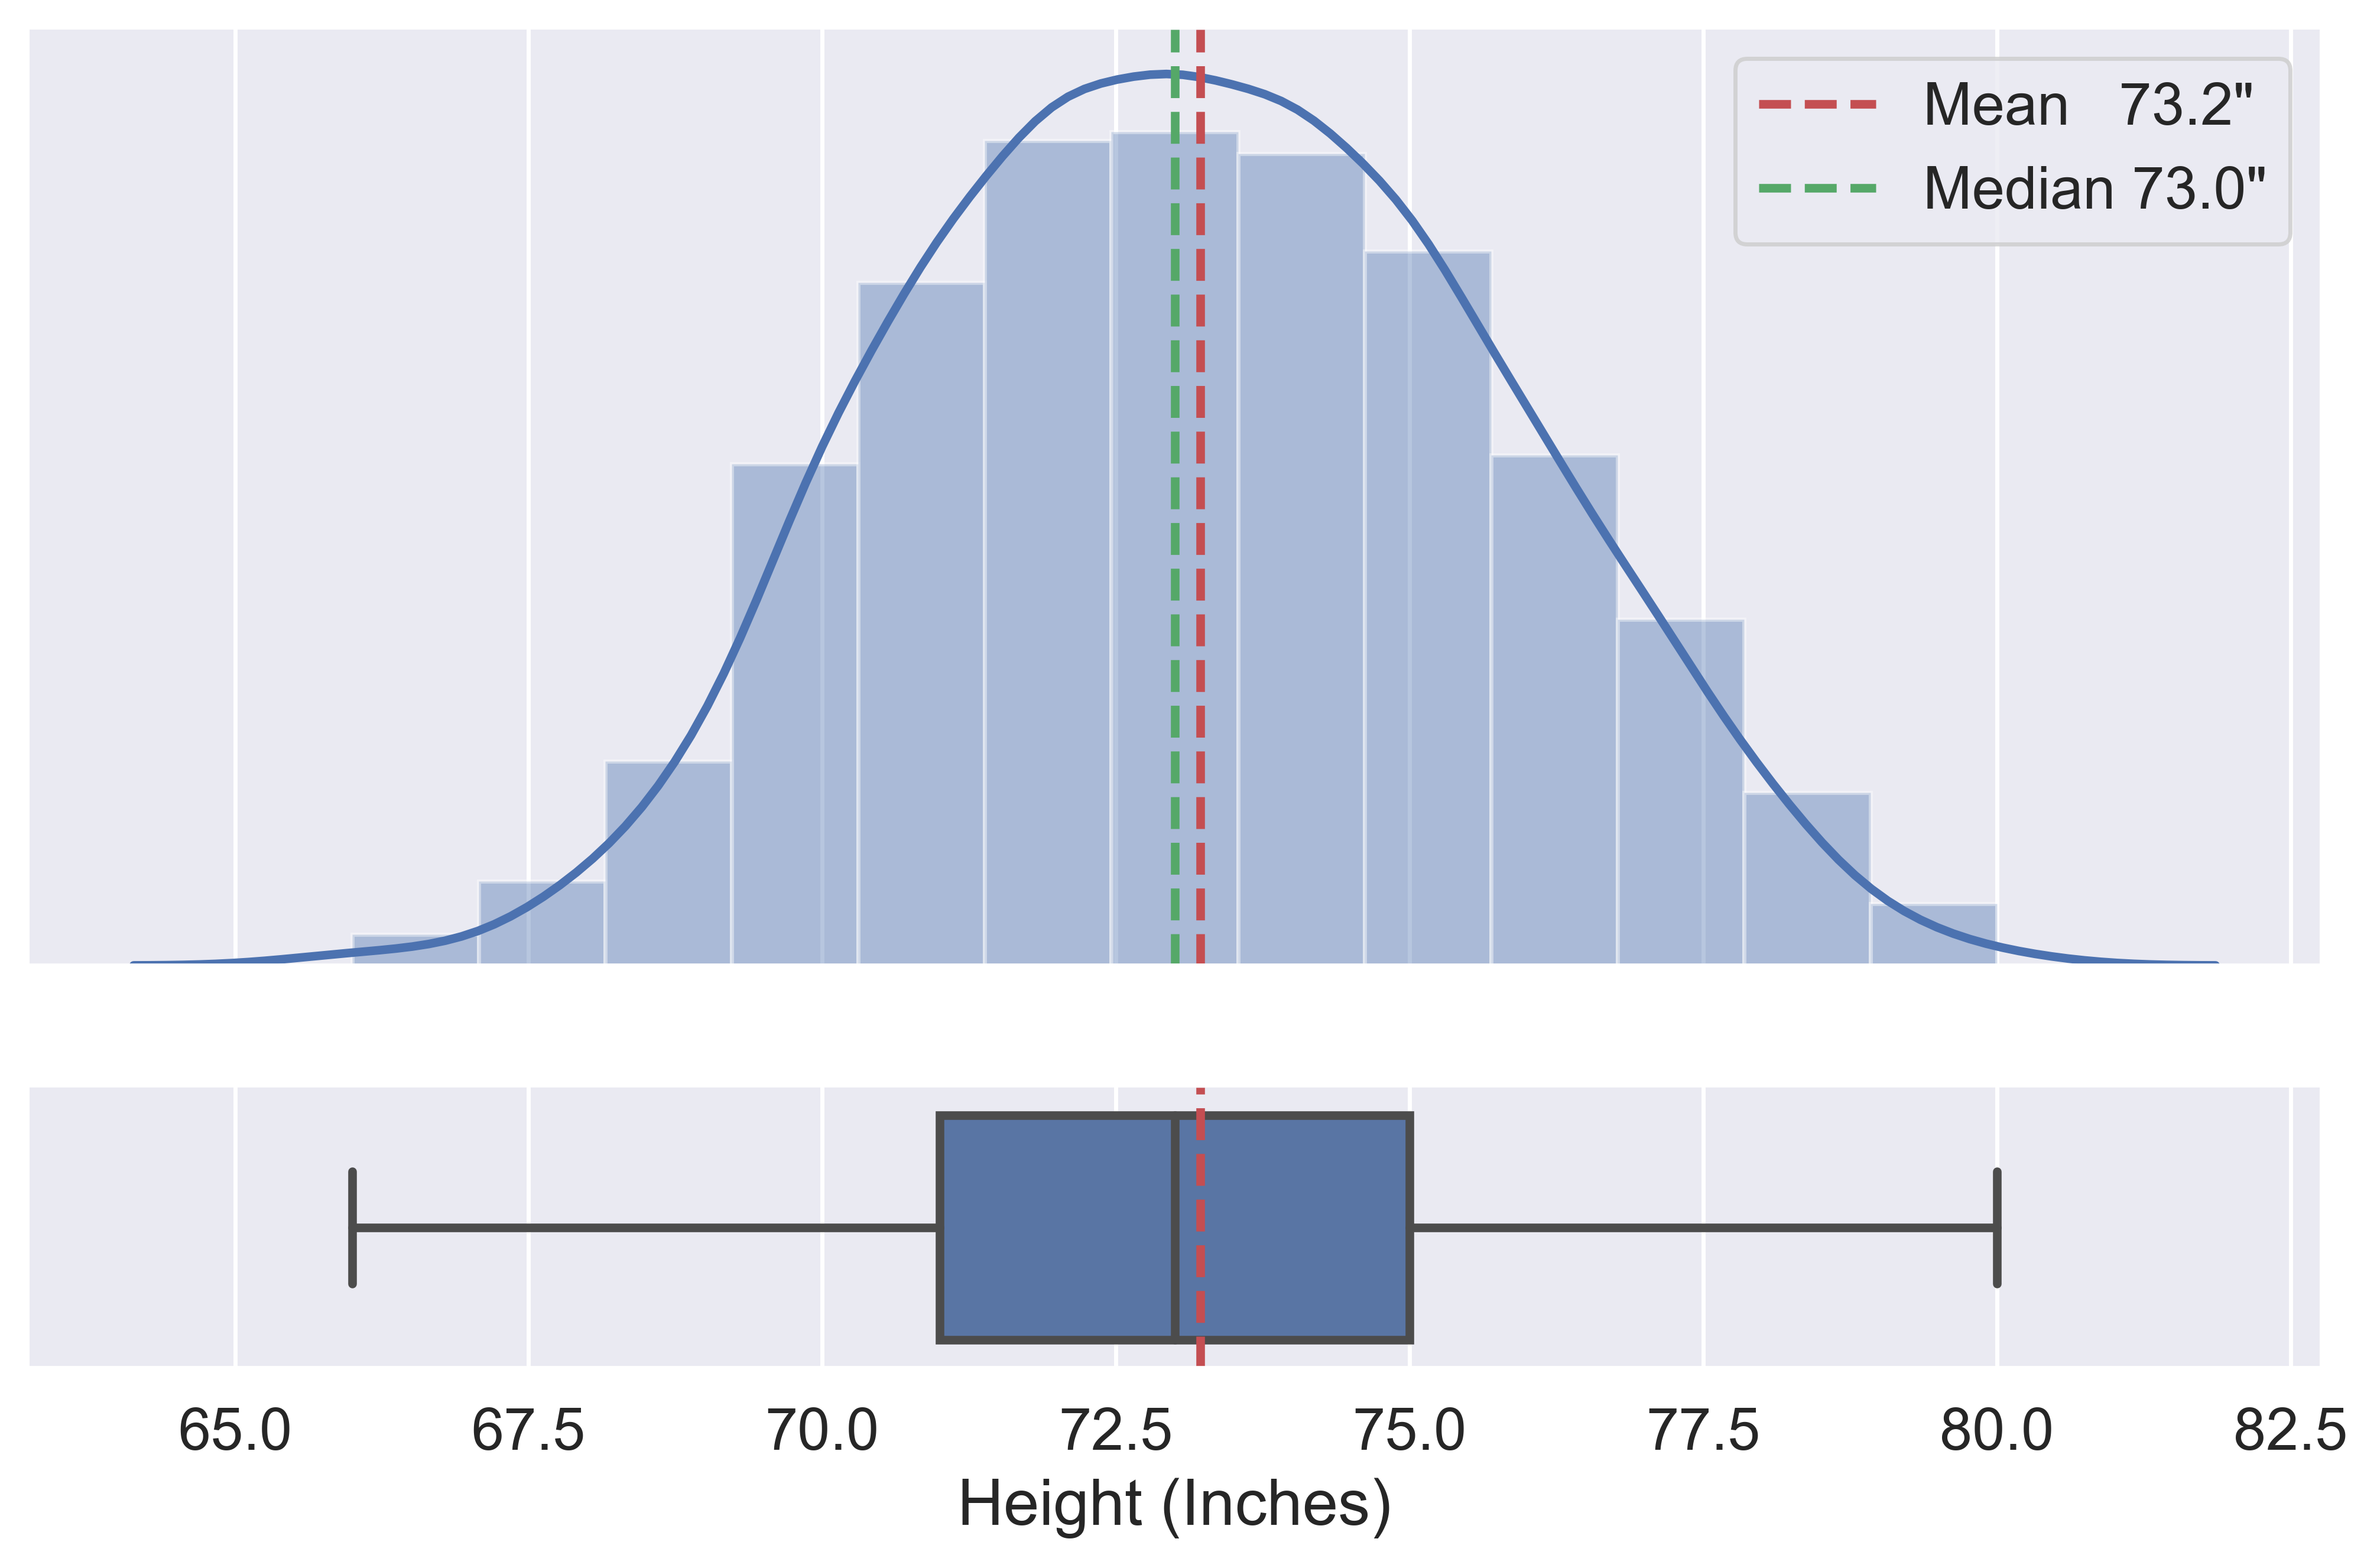

In [490]:
# checking distribution of player heights

sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.1})

fig, ax = plt.subplots(nrows=2, figsize=(10,6), gridspec_kw= {"height_ratios": (1, 0.3)}, sharex=True, dpi=500)
mean=players.height.mean()
median=players.height.median()

sns.boxplot(players.height, ax=ax[1]).set(xlabel='Height (Inches)')
sns.distplot(players.height, ax=ax[0], bins=13, axlabel='')
sns.despine(left=True)

ax[0].axvline(mean, color='r', linestyle='--')
ax[1].axvline(mean, color='r', linestyle='--')
ax[0].axvline(median, color='g', linestyle='--')

ax[0].legend({'Mean   73.2"':mean,'Median 73.0"':median})

ax[0].set(yticks=[])
ax[1].set(yticks=[])

plt.show()

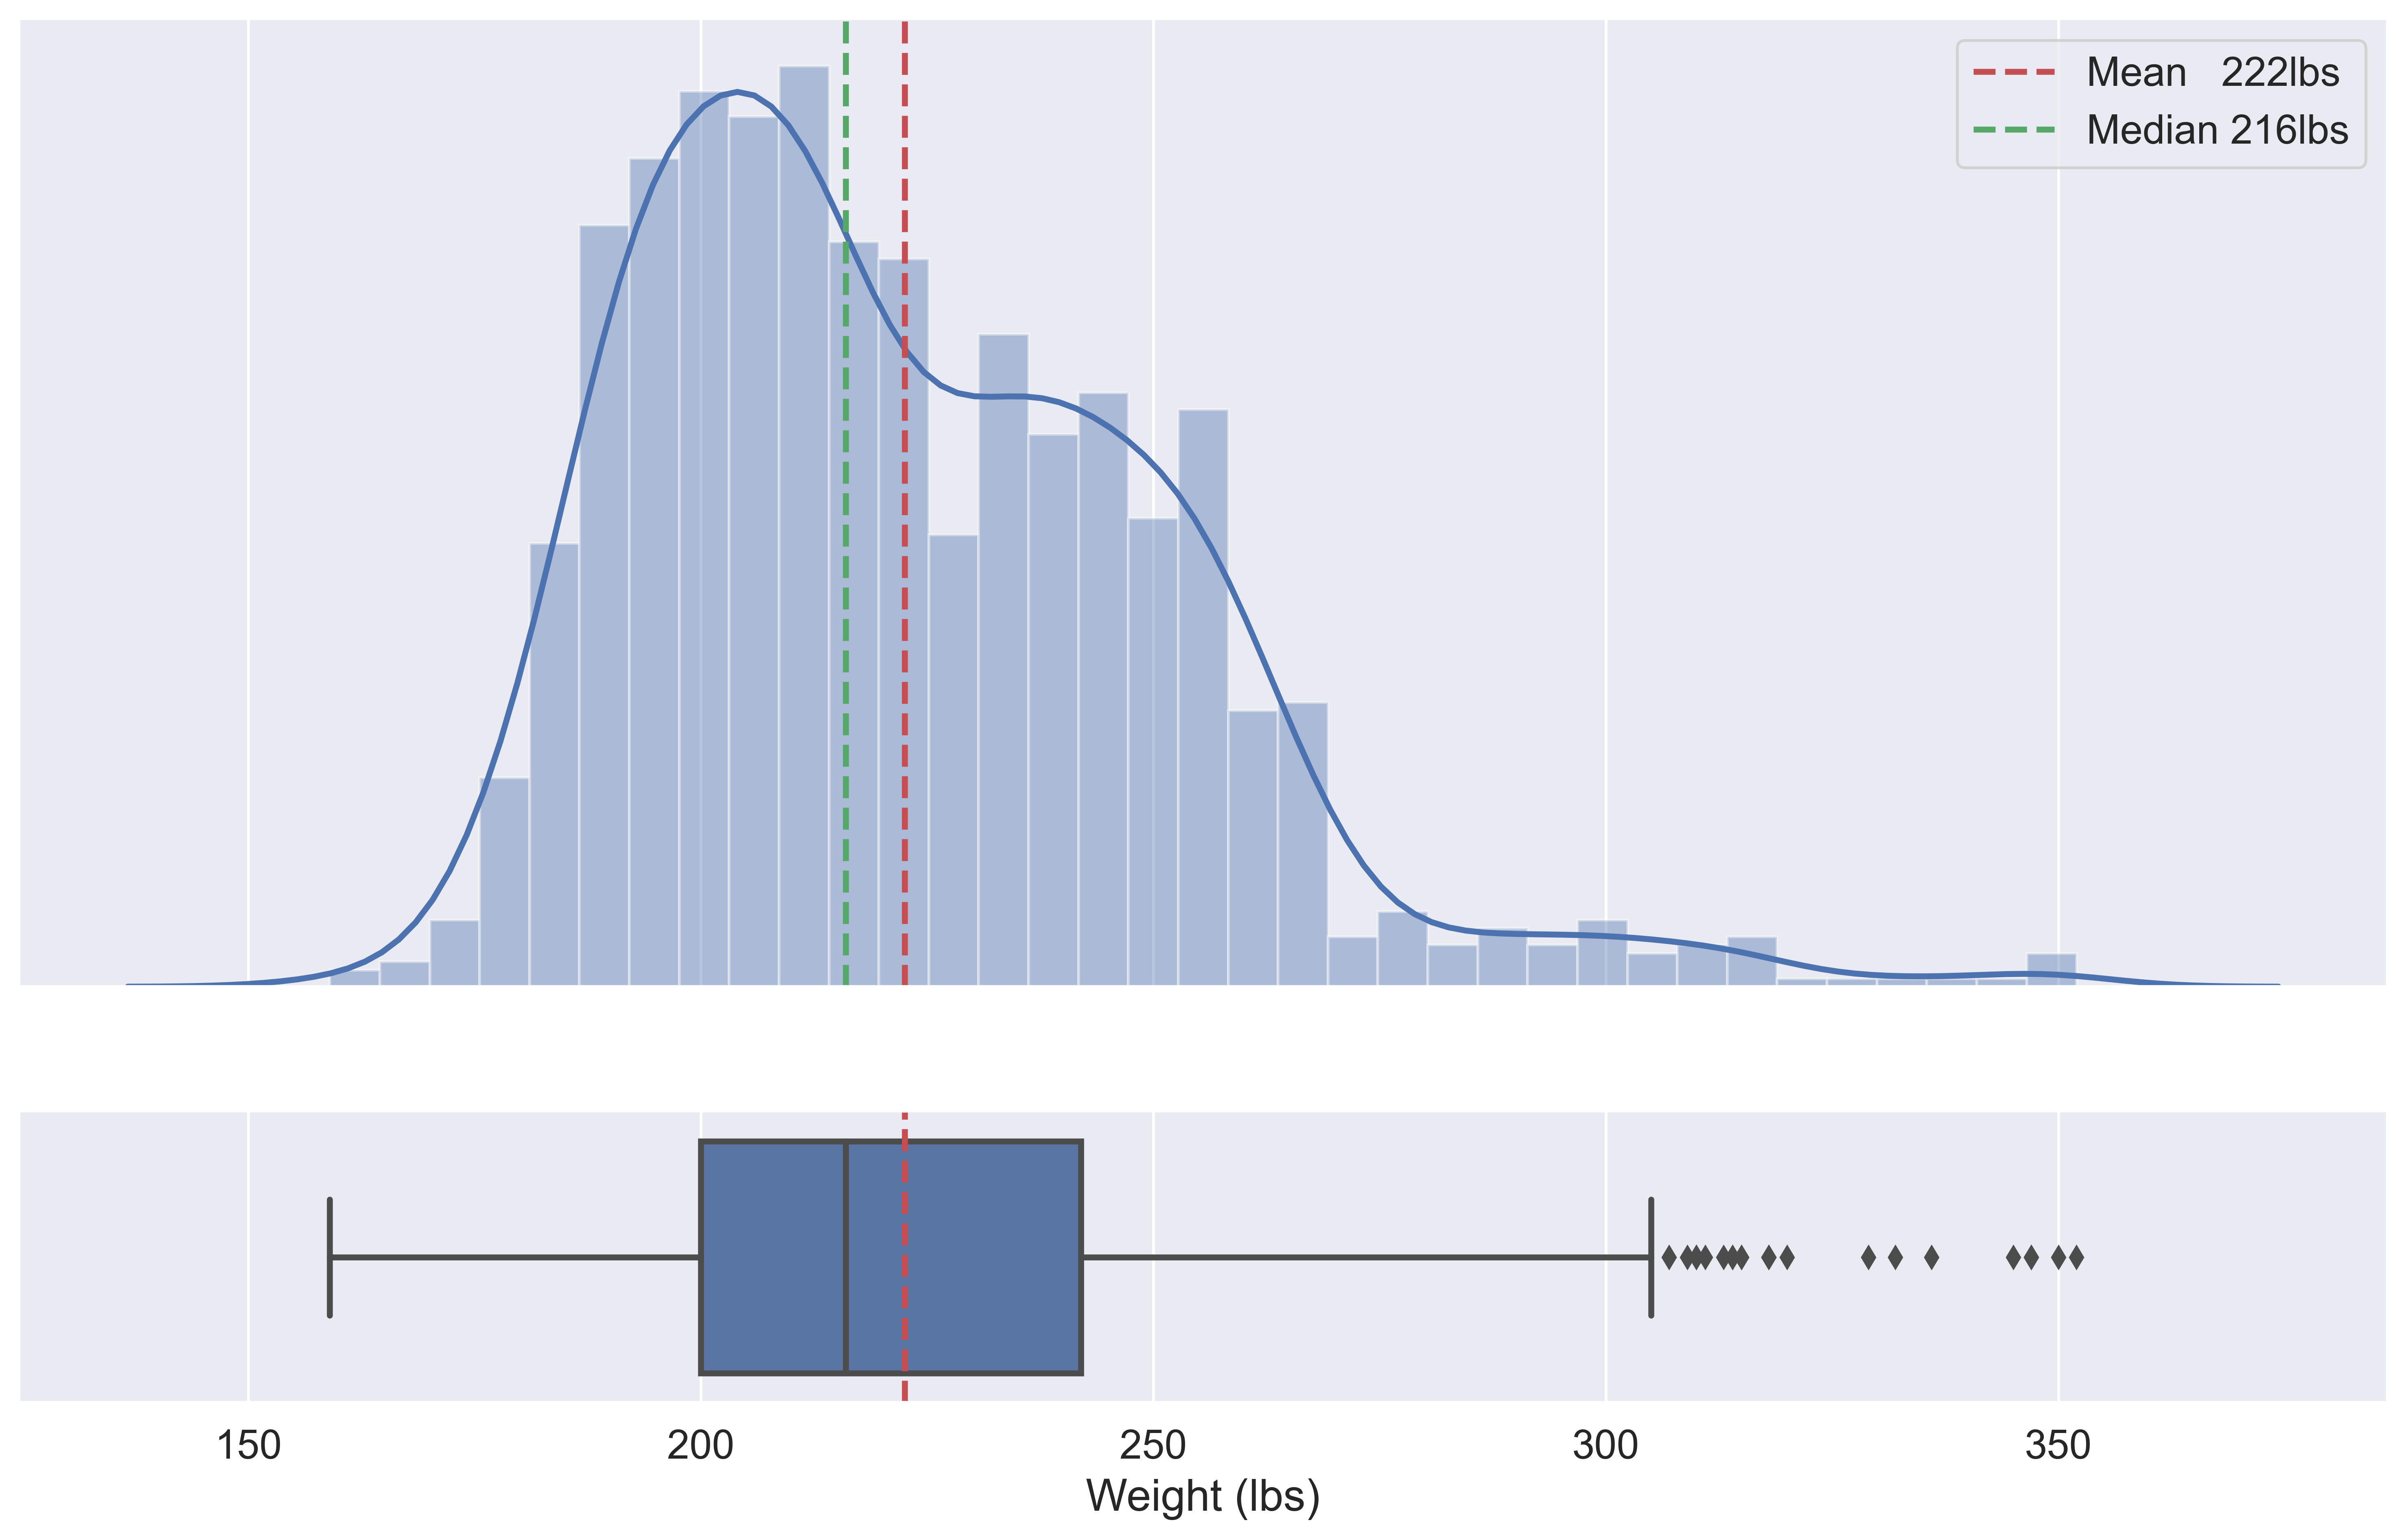

In [491]:
# checking distribution of player weights

sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.1})

fig, ax = plt.subplots(nrows=2, figsize=(15,9), gridspec_kw= {"height_ratios": (1, 0.3)}, sharex=True, dpi=500)
mean=players.weight.mean()
median=players.weight.median()

sns.boxplot(players.weight, ax=ax[1]).set(xlabel='Weight (lbs)')
sns.distplot(players.weight, ax=ax[0], bins=35, axlabel='')
sns.despine(left=True)


ax[0].axvline(mean, color='r', linestyle='--')
ax[1].axvline(mean, color='r', linestyle='--')
ax[0].axvline(median, color='g', linestyle='--')

ax[0].legend({'Mean   222lbs':mean,'Median 216lbs':median})

ax[0].set(yticks=[])
ax[1].set(yticks=[])

plt.show()

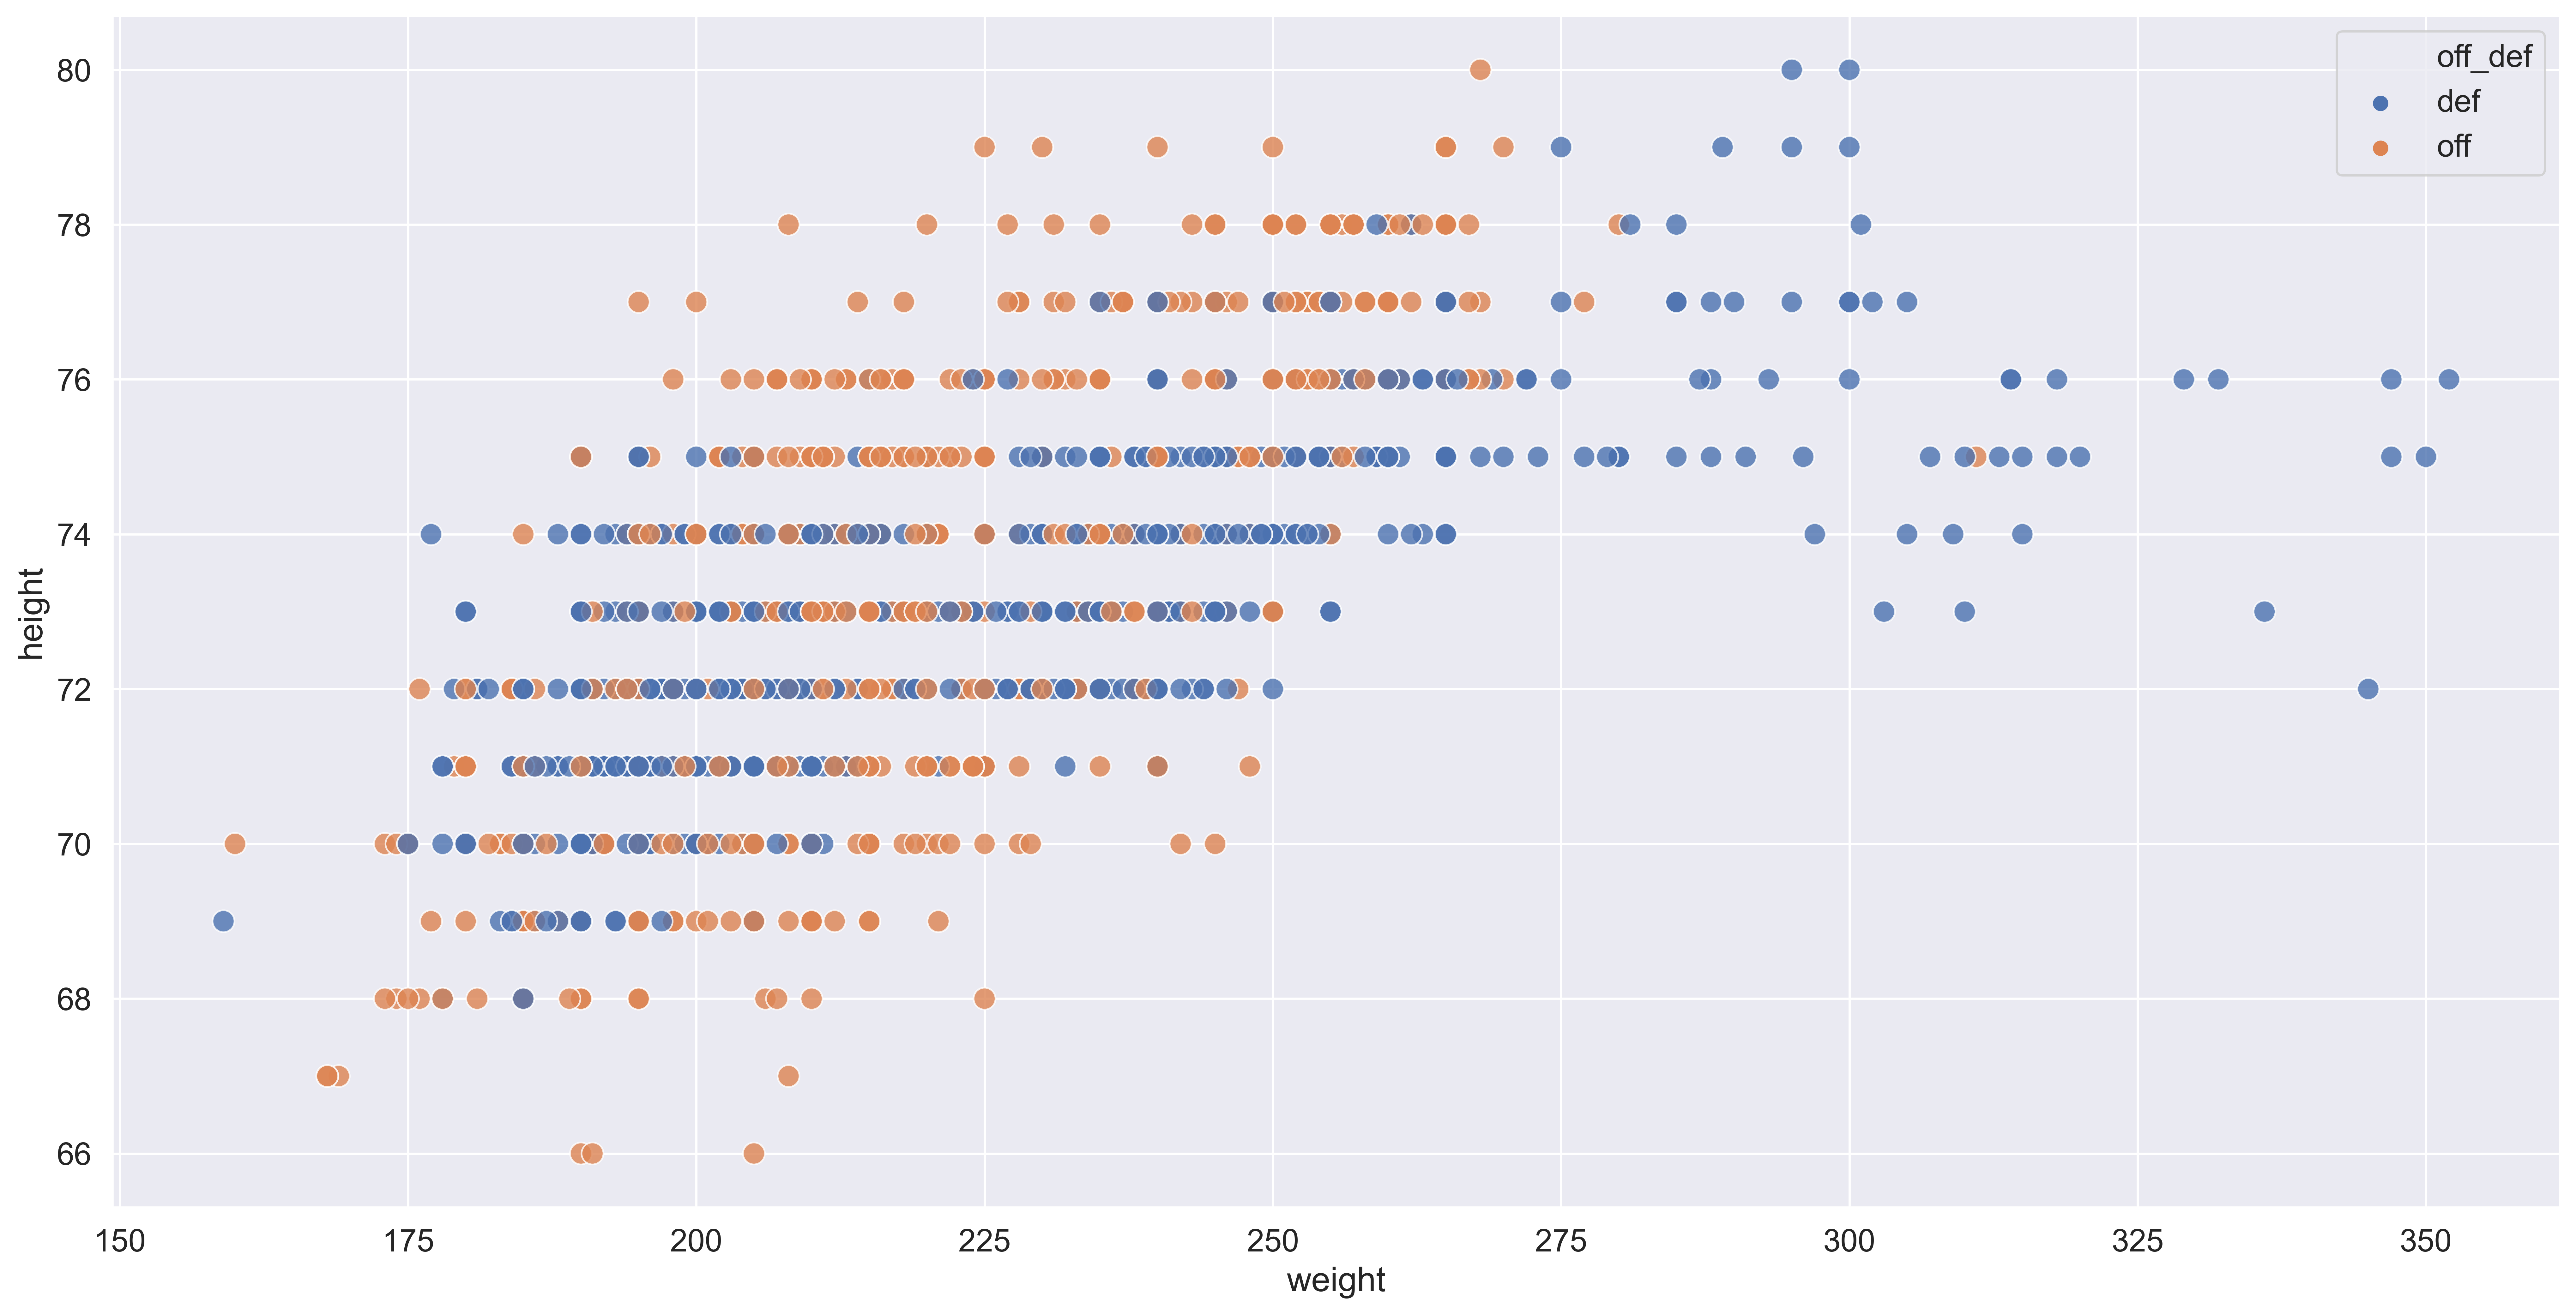

In [492]:
# showing differences in player heights and weights based on offense / defense

fig, ax = plt.subplots(figsize=(20,10), dpi=500)
ax = sns.scatterplot(data=players, x="weight", y="height", hue="off_def", s=100, style=None , alpha=0.8)

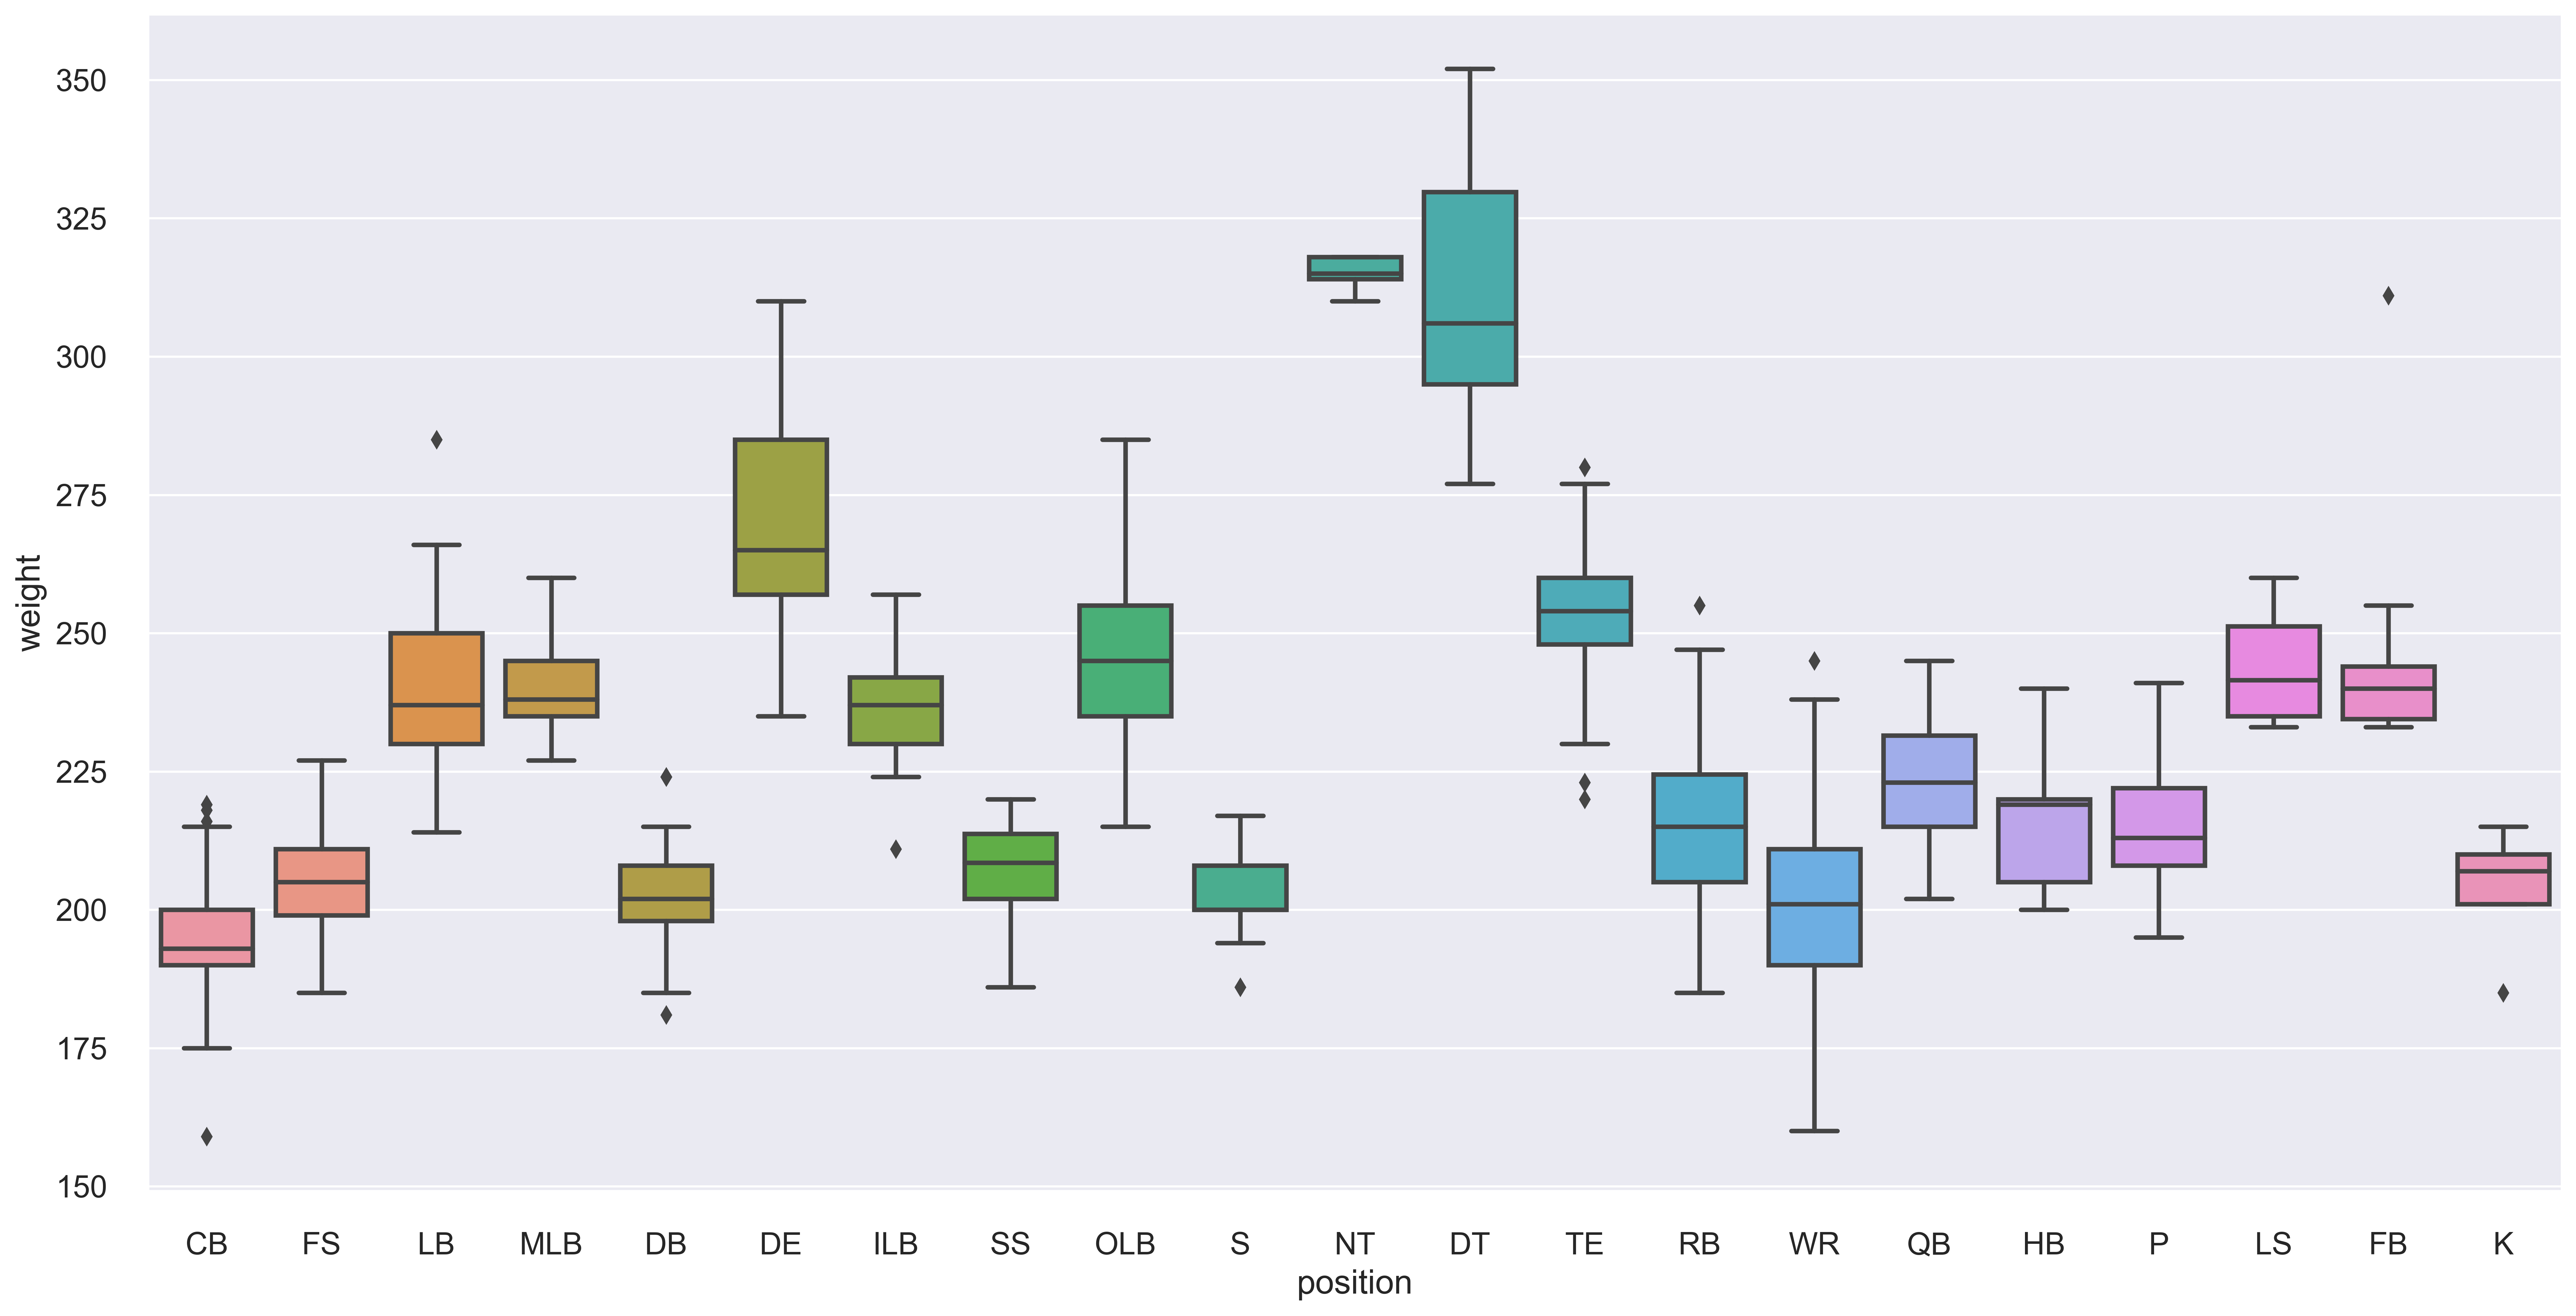

In [493]:
# showing differences in player weights based on position

fig, ax = plt.subplots(figsize=(20,10), dpi=500)

ax = sns.boxplot(x="position", y="weight",
            
            data=players.sort_values('off_def'))

sns.despine(offset=10, trim=True)

In [ ]:
players.to_csv(r'/Users/jamesgibbins/Desktop/DSI_capstone/capstone_data/players_clean.csv', index = False)

# P3: Summary

- Player data is provided for 1303 players
- We see a very normal distribution of player heights 
- We see a much different spread of player weights based on positions - with defensive players being heavier on average

# P4: Raw GPS Data Cleaning <a id='p4'></a>

In [243]:
play_info=plays[['uniqueId','home','away','offenseTeam','defenseTeam','absoluteYardlineNumber','week']]
play_info

,uniqueId,home,away,offenseTeam,defenseTeam,absoluteYardlineNumber,week
0,20180906000075,PHI,ATL,ATL,PHI,90.0,1
1,20180906000146,PHI,ATL,ATL,PHI,49.0,1
2,20180906000168,PHI,ATL,ATL,PHI,49.0,1
3,20180906000190,PHI,ATL,ATL,PHI,49.0,1
4,20180906000256,PHI,ATL,ATL,PHI,11.0,1
...,...,...,...,...,...,...,...
16724,20181222013842,LAC,BAL,LAC,BAL,77.0,16
16725,20181222013884,LAC,BAL,LAC,BAL,70.0,16
16726,20181222013909,LAC,BAL,LAC,BAL,53.0,16
16727,20181222013931,LAC,BAL,LAC,BAL,53.0,16


In [244]:
w1=pd.read_csv('/Users/jamesgibbins/Desktop/DSI_capstone/nfl_big_data_bowl_2021_raw_data/week1.csv')

In [245]:
w1

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986017,2018-09-11T05:29:39.900Z,33.68,43.14,1.96,3.79,0.22,281.35,309.70,None,2556277.0,Marqui Christian,41.0,SS,65,away,2018091001,4192,left,NaN
986018,2018-09-11T05:29:39.900Z,36.02,40.21,0.81,1.52,0.09,308.07,234.06,None,2556593.0,Cory Littleton,58.0,ILB,65,away,2018091001,4192,left,NaN
986019,2018-09-11T05:29:39.900Z,33.02,43.81,2.63,4.57,0.27,183.83,314.39,None,2556885.0,Jalen Richard,30.0,RB,65,home,2018091001,4192,left,SCREEN
986020,2018-09-11T05:29:39.900Z,34.13,40.86,0.15,0.72,0.02,6.17,267.87,None,2558183.0,John Johnson,43.0,SS,65,away,2018091001,4192,left,NaN


In [246]:
w1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986022 entries, 0 to 986021
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   time           986022 non-null  object 
 1   x              986022 non-null  float64
 2   y              986022 non-null  float64
 3   s              986022 non-null  float64
 4   a              986022 non-null  float64
 5   dis            986022 non-null  float64
 6   o              919109 non-null  float64
 7   dir            919109 non-null  float64
 8   event          986022 non-null  object 
 9   nflId          919109 non-null  float64
 10  displayName    986022 non-null  object 
 11  jerseyNumber   919109 non-null  float64
 12  position       919109 non-null  object 
 13  frameId        986022 non-null  int64  
 14  team           986022 non-null  object 
 15  gameId         986022 non-null  int64  
 16  playId         986022 non-null  int64  
 17  playDirection  986022 non-nul

In [ ]:
load_name = r'/Users/jamesgibbins/Desktop/DSI_capstone/nfl_big_data_bowl_2021_raw_data/week{}.csv'
save_name = r'/Users/jamesgibbins/Desktop/DSI_capstone/capstone_data/week{}_clean.csv'
for i in range(1,18):
    
    df=pd.read_csv(load_name.format(i))

    # drop jersey Numbers
    df.drop('jerseyNumber', axis=1, inplace=True)
    
    # drop duplicate rows
    df=df.drop_duplicates().reset_index(drop=True)
    
    # create uniqueId for each play by combining GameId and PlayId columns - the same method as for the plays data
    df['uniqueId']=df['gameId']*10000+df['playId']

    # changing direction so all plays are from left to right with respect to offense
    df['x']=[df['x'][i] if df['playDirection'][i]=='right' else 120-df['x'][i] for i in range(len(df))]
    df['y']=[df['y'][i] if df['playDirection'][i]=='right' else 53.3-df['y'][i] for i in range(len(df))]
    
    df['o']=[df['o'][i] if df['playDirection'][i]=='right' 
       else df['o'][i]-180 if df['o'][i]>=180 
       else df['o'][i]+180 
       for i in range(len(df))]
    
    df['dir']=[df['dir'][i] if df['playDirection'][i]=='right' 
        else df['dir'][i]-180 if df['dir'][i]>=180 
        else df['dir'][i]+180
        for i in range(len(df))]

    
    # cleaning timestamps for each frame 
    df[['date','time1']] = df.time.str.split('T',expand=True)
    df['frameTimestamp']= df.time1.apply(lambda x: x[:-1])
    df['frameTimestamp']= pd.to_datetime(df.date+' '+df.frameTimestamp)
    
    # merge with relevant plays_info
    df=pd.merge(df,play_info, on='uniqueId')
    
    #rename some columns for clarity
    df.rename(columns={"team": "home_away", "absoluteYardlineNumber" : "lineScrim"}, 
              inplace=True)
    
    # creating a label for offense , defense and football
    df['team']=['football' if df.home_away[i] == 'football' 
          else df.home[i] if df.home_away[i] == 'home' 
          else df.away[i] for i in range(len(df))]
    

    df['off_def_ball']=['football' if df.team[i] == 'football' 
                      else 'offense' if df.team[i] == df.offenseTeam[i]  
                      else 'defense' for i in range(len(df))]
    
    df=df.drop(['offenseTeam','home','away'], axis=True)
    
    
    # applying the same logic to the line of scrimmage (where all attacking plays will be transformed to the same direction) 
    df['lineScrim'] = [120-df.lineScrim[i] if df.playDirection[i]=='left' 
                       else df.lineScrim[i] for i in range(len(df))]
    
    
    
    df=df[['uniqueId','gameId', 'playId','week','playDirection','lineScrim','frameTimestamp','frameId','event',
            'nflId', 'displayName','position','team','home_away','off_def_ball',
           'route','x', 'y', 's', 'a', 'dis', 'o', 'dir']]
    
    df.to_csv(save_name.format(i), index=False)

# P4: Summary

- For each week gps data has been provided for selected offensive and defensive players on each play
- The data relates to absolute field positions on a 120 yard by 53.3 yard american football field. 
- The data has been processed in a few ways , including to make sure every play involves the offense moving the ball from left to right

# P5: Selecting Data for Analysis <a id='p5'></a>

In [222]:
# certain frames have been labelled based on the action that occurs in that frame

event_frames=w1c.groupby('event')[['frameId']].agg(['median','mean']).reset_index()
event_frames.columns = event_frames.columns.map('_'.join)

event_frames[(event_frames['event_'].str.contains('pass_outcome'))|(event_frames['event_'].str.contains('pass_forward'))
             |(event_frames['event_'].str.contains('snap'))].sort_values('frameId_mean')

,event_,frameId_median,frameId_mean
1,ball_snap,11,10.984314
12,pass_forward,36,38.347391
13,pass_outcome_caught,47,48.705845
16,pass_outcome_touchdown,52,55.215000
15,pass_outcome_interception,55,55.948403
14,pass_outcome_incomplete,54,56.938877


# P5: Summary

- We can see that the ball snap generally occurs after 10 frames (1 second). The snap is the first moment where the play is live.
- On average there is a pass forward made around 2.6 - 2.8 seconds after the snap
- On average passing outcomes occur 1.5 seconds after the pass is thrown
- For the analysis I will be using GPS from 4 frames of each play. The Snap / Pass Forward / 0.5 seconds after pass / 1.0 seconds after pass.
- By feature engineering I will track how players are moving relative to each other and the ball between these frames and use this data to train a model to predict the outcome of the play.

# P6: Extracting Frames <a id='p6'></a>

In [252]:
load_name = r'/Users/jamesgibbins/Desktop/DSI_capstone/capstone_data/week{}_clean.csv'
dfs=[]
for i in range(1, 18):
    
    df = pd.read_csv(load_name.format(i))
    
    df = df.sort_values(['uniqueId','frameId','off_def_ball']).reset_index(drop=True)

    df['unique_frameId']=df.apply(lambda x: (x[0]*1000+x[7]), axis=1)
    
    pf_ufid=df[df['event']=='pass_forward']['unique_frameId'].unique()

    pf_plus5=list(pf_ufid+5)
    
    pf_plus10=list(pf_ufid+10)

    df['p+5']=[1 if df.unique_frameId[i] in (pf_plus5) else 0 for i in range(len(df))]

    df['p+10']=[1 if df.unique_frameId[i] in (pf_plus10) else 0 for i in range(len(df))]

    df_red = df[(df['event']=='ball_snap')|(df['event']=='pass_forward')|(df['p+5']==1)|(df['p+10']==1)].reset_index(drop=True)
    
    dfs.append(df_red)
    
df = pd.concat(dfs, ignore_index = True)

df.to_csv(r'/Users/jamesgibbins/Desktop/DSI_capstone/capstone_data/sn_pass_p5_p10.csv', index=False)

In [253]:
df=pd.read_csv('/Users/jamesgibbins/Desktop/DSI_capstone/capstone_data/sn_pass_p5_p10.csv')

In [254]:
# Labelling the 4 frames
df['event']=['snap' if df.event[i]=='ball_snap' else 'pass' if df.event[i]=='pass_forward' else 'p+5' if df['p+5'][i]==1 else 'p+10' for i in range(len(df))]

In [255]:
df['snap']=[1 if df.event[i]=='snap' else 0 for i in range(len(df))]
df['pass']=[1 if df.event[i]=='pass' else 0 for i in range(len(df))]
df['p5']=[1 if df.event[i]=='p+5' else 0 for i in range(len(df))]
df['p10']=[1 if df.event[i]=='p+10' else 0 for i in range(len(df))]

In [256]:
# checking for missing data
group1=df.groupby('uniqueId')[['snap','pass','p5','p10']].sum()
group1

,snap,pass,p5,p10
uniqueId,,,,
20180906000075,14,14,14,14
20180906000146,14,14,14,14
20180906000168,14,14,14,14
20180906000190,14,14,14,14
20180906000256,12,12,12,12
...,...,...,...,...
20181230153794,14,14,14,14
20181230153819,14,14,14,14
20181230153969,14,14,14,14


In [257]:
group1['check_missing']=group1.apply(lambda x: x[0]-((x[0]+x[1]+x[2]+x[3])/4)  , axis=1)

In [258]:
group1

,snap,pass,p5,p10,check_missing
uniqueId,,,,,
20180906000075,14,14,14,14,0.0
20180906000146,14,14,14,14,0.0
20180906000168,14,14,14,14,0.0
20180906000190,14,14,14,14,0.0
20180906000256,12,12,12,12,0.0
...,...,...,...,...,...
20181230153794,14,14,14,14,0.0
20181230153819,14,14,14,14,0.0
20181230153969,14,14,14,14,0.0


In [259]:
# where the check_missing column is not equal to zero we are missing data from 1 or more frames
missing=group1[group1['check_missing']!=0].index

In [260]:
missing

Int64Index([20180906000636, 20180906001628, 20180906002764, 20180906004207,
            20180909000925, 20180909001847, 20180909002572, 20180909010096,
            20180909010523, 20180909011177,
            ...
            20181230103163, 20181230120060, 20181230120586, 20181230120709,
            20181230121587, 20181230121690, 20181230122319, 20181230130898,
            20181230132436, 20181230142982],
           dtype='int64', name='uniqueId', length=735)

In [261]:
# for example in this play - we only have GPS data for the snap - no other frames
group1.loc[20181230142982]

snap             14.0
pass              0.0
p5                0.0
p10               0.0
check_missing    10.5
Name: 20181230142982, dtype: float64

In [262]:
# drop any plays with missing data
df=df[~df['uniqueId'].isin(missing)]

In [263]:
df['event'].value_counts()

p+5     234596
snap    234583
pass    234583
p+10    234570
Name: event, dtype: int64

In [264]:
df.to_csv(r'/Users/jamesgibbins/Desktop/DSI_capstone/capstone_data/sn_pass_p5_p10_clean.csv', index=False)

# P7: Flattening Plays <a id='p7'></a>

In [265]:
df=pd.read_csv('/Users/jamesgibbins/Desktop/DSI_capstone/capstone_data/sn_pass_p5_p10_clean.csv')

In [266]:
len(df['uniqueId'].unique())

15994

In [267]:
df.columns

Index(['uniqueId', 'gameId', 'playId', 'week', 'playDirection', 'lineScrim',
       'frameTimestamp', 'frameId', 'event', 'nflId', 'displayName',
       'position', 'team', 'home_away', 'off_def_ball', 'route', 'x', 'y', 's',
       'a', 'dis', 'o', 'dir', 'unique_frameId', 'p+5', 'p+10', 'snap', 'pass',
       'p5', 'p10'],
      dtype='object')

In [268]:
df=df[['uniqueId', 'gameId', 'playId','week', 'playDirection', 'lineScrim',
     'nflId', 'displayName','position', 'team', 'home_away', 'off_def_ball', 'route','frameId','event', 'x', 'y', 's',
    'a', 'dis', 'o', 'dir']]

In [269]:
# taking each of the 4 frames data into its own dataframe

sn = df[df['event']=='snap']

pa = df[df['event']=='pass']

p5 = df[df['event']=='p+5']

p10 = df[df['event']=='p+10']

In [270]:
info=['uniqueId','week','gameId','playId','playDirection','lineScrim',
      'nflId','displayName','position','team','home_away',
      'off_def_ball', 'ball','route']

In [ ]:
# merging the frames into a flattened dataframe
flat1=sn.merge(pa, on=info, suffixes=['_snap', '_pass']).merge(p5.merge(p10, on=info, suffixes=['_p5','_p10']))

In [ ]:
flat1.head(5)

In [ ]:
flat1.to_csv(r'/Users/jamesgibbins/Desktop/DSI_capstone/capstone_data/sn_pass_p5_p10_flat.csv', index=False)

In [271]:
df=pd.read_csv('/Users/jamesgibbins/Desktop/DSI_capstone/capstone_data/sn_pass_p5_p10_flat.csv')

In [272]:
print('plays:',len(df['uniqueId'].unique()))
print('footballs:',len(df[df['off_def_ball']=='football']))

plays: 15993
footballs: 15993


In [273]:
# some plays have only offense or defense tracking info

check_offdef=df.groupby('uniqueId')[['off_def_ball']].nunique().reset_index()

check_offdef[check_offdef['off_def_ball']!=3]

,uniqueId,off_def_ball
1959,20180920001539,2
2321,20180923051553,2
2875,20180924001867,2
3358,20180930050168,2
5860,20181014121559,2
5867,20181014121922,2
5868,20181014121946,2
6104,20181021012734,2
6869,20181025001655,2
7466,20181028090298,2


In [274]:
# in this example we see no defensive player data is available
df[df['uniqueId']==20181014121559]

,uniqueId,gameId,playId,week,playDirection,lineScrim,nflId,displayName,position,team,home_away,off_def_ball,ball,route,frameId_snap,event_snap,x_snap,y_snap,s_snap,a_snap,dis_snap,o_snap,dir_snap,frameId_pass,event_pass,x_pass,y_pass,s_pass,a_pass,dis_pass,o_pass,dir_pass,frameId_p5,event_p5,x_p5,y_p5,s_p5,a_p5,dis_p5,o_p5,dir_p5,frameId_p10,event_p10,x_p10,y_p10,s_p10,a_p10,dis_p10,o_p10,dir_p10
86000,20181014121559,2018101412,1559,6,right,109.0,NaN,Football,NaN,football,football,football,1,NaN,11,snap,109.03,30.09,0.00,0.00,0.01,NaN,NaN,39,pass,100.34,24.60,7.88,12.73,0.73,NaN,NaN,44,p+5,105.96,15.97,23.57,5.23,6.94,NaN,NaN,49,p+10,107.59,12.17,4.09,1.38,0.41,NaN,NaN
86001,20181014121559,2018101412,1559,6,right,109.0,497240.0,Rob Gronkowski,TE,NE,home,offense,0,FLAT,11,snap,108.14,26.15,0.00,0.00,0.06,71.56,164.91,39,pass,110.96,13.91,7.03,0.71,0.70,226.67,158.19,44,p+5,112.37,10.59,7.11,1.16,0.72,215.34,155.75,49,p+10,113.92,7.57,6.42,2.28,0.65,187.83,149.67
86002,20181014121559,2018101412,1559,6,right,109.0,2504211.0,Tom Brady,QB,NE,home,offense,0,NaN,11,snap,107.31,30.03,0.34,2.84,0.00,100.78,244.71,39,pass,98.75,25.99,5.07,0.95,0.51,156.33,219.23,44,p+5,97.23,24.15,4.47,1.56,0.45,142.40,221.01,49,p+10,95.92,22.56,3.72,1.78,0.38,141.66,216.88
86003,20181014121559,2018101412,1559,6,right,109.0,2508101.0,James Develin,FB,NE,home,offense,0,FLAT,11,snap,104.29,30.13,0.00,0.00,0.01,135.62,120.91,39,pass,107.08,17.21,5.15,1.09,0.52,276.15,170.41,44,p+5,107.53,14.67,5.02,0.88,0.51,276.40,170.16,49,p+10,107.64,12.27,4.51,2.73,0.46,17.62,184.60
86004,20181014121559,2018101412,1559,6,right,109.0,2533046.0,Dwayne Allen,TE,NE,home,offense,0,NaN,11,snap,108.10,33.77,0.64,0.35,0.09,95.69,31.05,39,pass,106.27,33.79,1.17,1.52,0.11,9.34,260.25,44,p+5,105.42,33.84,2.27,2.09,0.21,326.02,277.19,49,p+10,103.98,33.93,3.41,1.58,0.33,302.09,267.73
86005,20181014121559,2018101412,1559,6,right,109.0,2558956.0,Jacob Hollister,TE,NE,home,offense,0,CROSS,11,snap,107.32,35.55,2.32,3.34,0.24,71.01,23.28,39,pass,115.46,29.07,6.40,2.72,0.64,184.35,148.79,44,p+5,116.75,26.11,6.43,2.41,0.65,206.80,163.12,49,p+10,117.42,22.92,6.59,0.85,0.66,208.45,170.73
86006,20181014121559,2018101412,1559,6,right,109.0,2560809.0,Sony Michel,RB,NE,home,offense,0,NaN,11,snap,102.55,29.64,0.00,0.00,0.01,153.48,44.98,39,pass,103.10,24.99,3.74,1.73,0.37,162.73,226.15,44,p+5,101.42,23.77,4.43,1.80,0.44,185.58,240.87,49,p+10,99.49,22.93,3.86,1.80,0.40,194.96,249.94


In [275]:
miss_off_def=check_offdef[check_offdef['off_def_ball']!=3]['uniqueId'].unique()

In [276]:
# 30 plays are missing offensive / defensive tracking
len(miss_off_def)

30

In [277]:
# drop any plays without offensive / defensive tracking
df=df[~df['uniqueId'].isin(miss_off_def)]